<a href="https://colab.research.google.com/github/muniprasadreddy/my-colab_work/blob/main/customerchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement 1**:You will be working with a dataset related to a company's customer churn. The goal is to predict
whether a customer is likely to churn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape


(7043, 21)

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID: A unique identifier assigned to each customer.

gender: The gender of the customer, typically represented as 'Male' or 'Female'.

SeniorCitizen: Indicates if the customer is a senior citizen, often represented as binary (1 = Yes, 0 = No).

Partner: Indicates if the customer has a partner, usually a 'Yes' or 'No' value.

Dependents: Shows if the customer has dependents (e.g., children or others), typically represented as 'Yes' or 'No'.

tenure: The number of months the customer has stayed with the company, which can indicate customer loyalty or duration of subscription.

PhoneService: Specifies whether the customer has a phone service subscription, generally 'Yes' or 'No'.

MultipleLines: Indicates if the customer has multiple phone lines, often 'Yes', 'No', or 'No
 phone service'.

InternetService: Type of internet service the customer subscribes to (e.g., 'DSL', 'Fiber optic', or 'No').

OnlineSecurity: Shows if the customer has opted for online security services, typically 'Yes', 'No', or 'No internet service'.

OnlineBackup: Indicates if the customer has online backup services, usually 'Yes', 'No', or 'No internet service'.

DeviceProtection: Shows if the customer has opted for device protection, generally 'Yes', 'No', or 'No internet service'.

TechSupport: Indicates if the customer has tech support services, typically 'Yes', 'No', or 'No internet service'.

StreamingTV: Specifies if the customer has a subscription for streaming TV, usually 'Yes', 'No', or 'No internet service'.

StreamingMovies: Shows if the customer has a subscription for streaming movies, generally 'Yes', 'No', or 'No internet service'.

Contract: The contract term of the customer, which might include options like 'Month-to-month', 'One year', or 'Two year'.

PaperlessBilling: Indicates if the customer uses paperless billing, usually 'Yes' or 'No'.

PaymentMethod: The payment method used by the customer, such as 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', or 'Credit card (automatic)'.

MonthlyCharges: The amount charged to the customer monthly.

TotalCharges: The total amount charged to the customer during their tenure.

Churn: Indicates if the customer has left the service (i.e., churned), often represented as 'Yes' or 'No'.

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


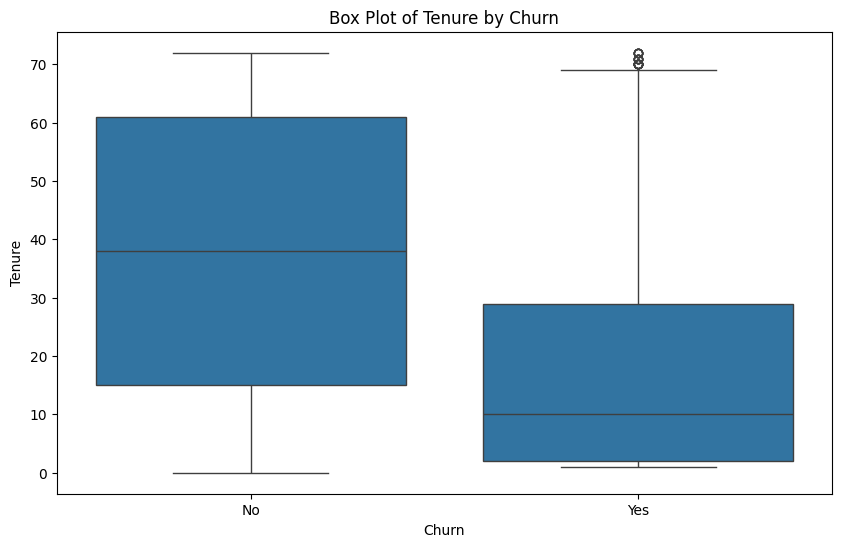

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

<ipython-input-5-0ff94bb039a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette="Set2")


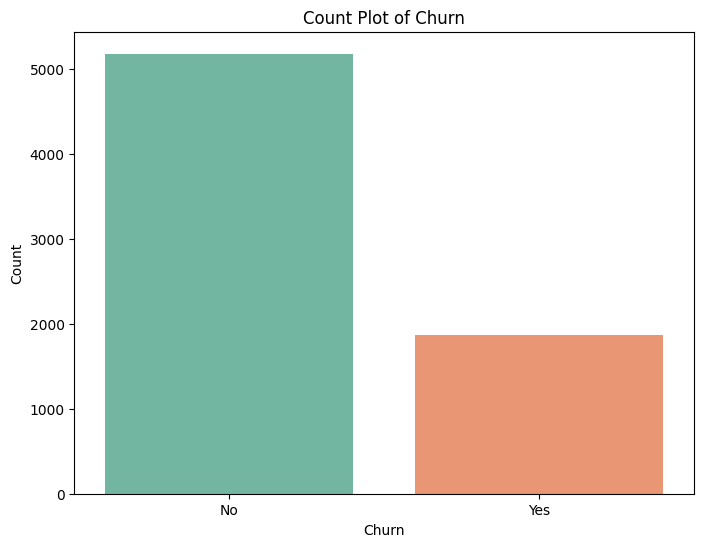

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data, palette="Set2")
plt.title('Count Plot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

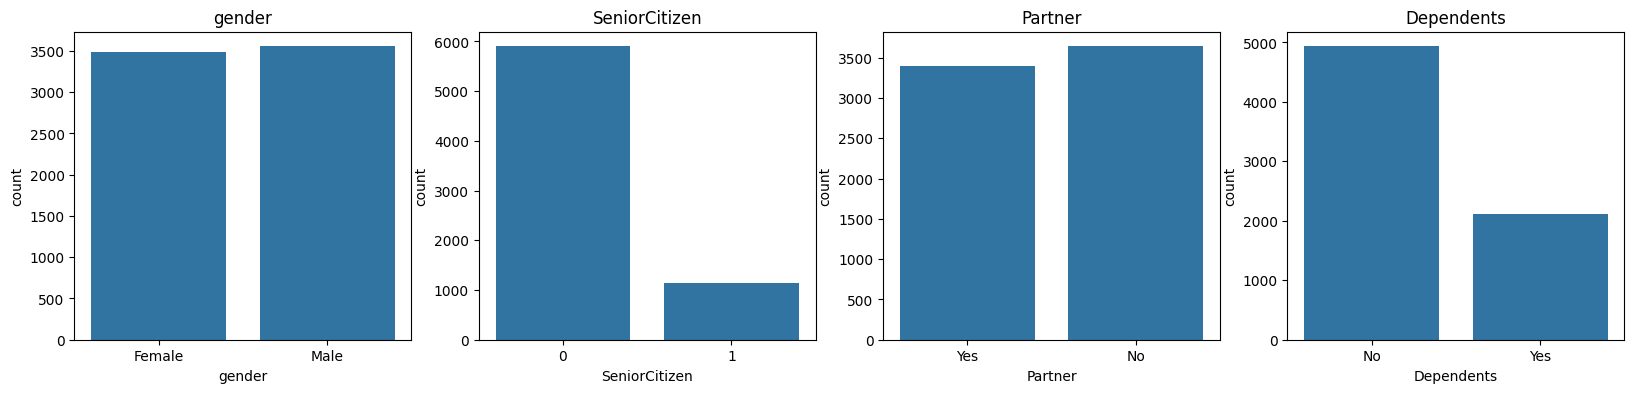

In [ ]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=data)
    ax.set_title(f"{col}")

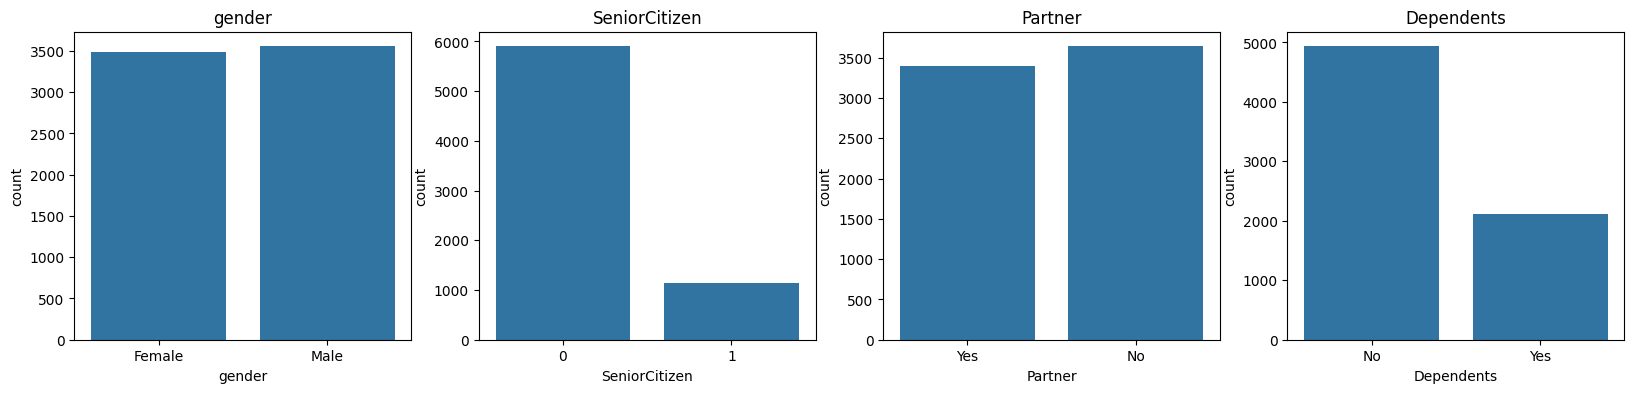

In [ ]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=data)
    ax.set_title(f"{col}")

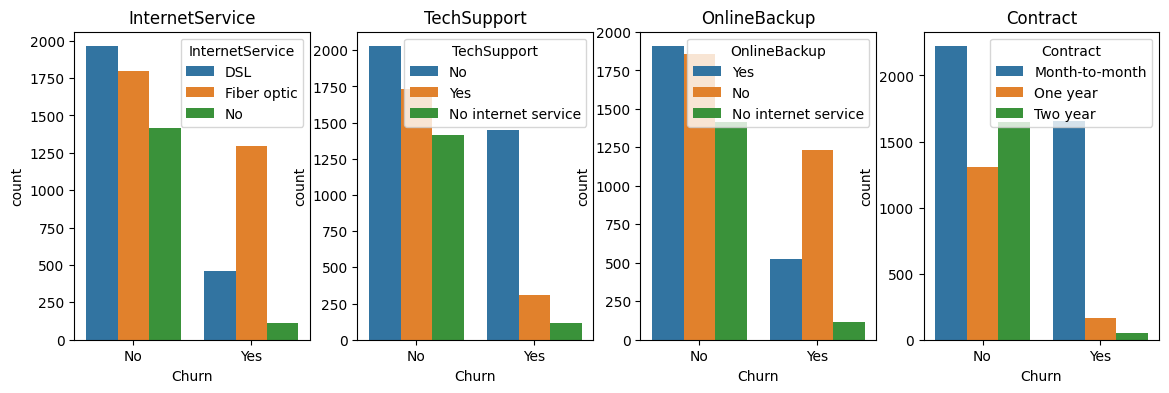

In [ ]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = data)
    ax.set_title(f"{col}")

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
categorical_cols =data.describe(include='object')
categorical_cols

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
num_cols=data.describe(include='number')
num_cols

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**data Cleaning**

In [ ]:
data['TotalCharges']

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [ ]:
data['TotalCharges'].isnull().sum()

0

In [ ]:
data['SeniorCitizen']

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
data['SeniorCitizen'].isnull().sum()

0

In [ ]:
for i in data.describe(include='object').columns:
   print(data[i].value_counts())

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes               

**Create a LabelEncoder**

In [ ]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
le = LabelEncoder()

In [ ]:
for col in categorical_cols:
     le.fit(data[col])
     data[col] = le.transform(data[col])

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:

for col in num_cols:
    print(data['Churn'].value_counts(),col) # Apply value_counts() to the 'Churn' column of the DataFrame

Churn
0    5174
1    1869
Name: count, dtype: int64 SeniorCitizen
Churn
0    5174
1    1869
Name: count, dtype: int64 tenure
Churn
0    5174
1    1869
Name: count, dtype: int64 MonthlyCharges


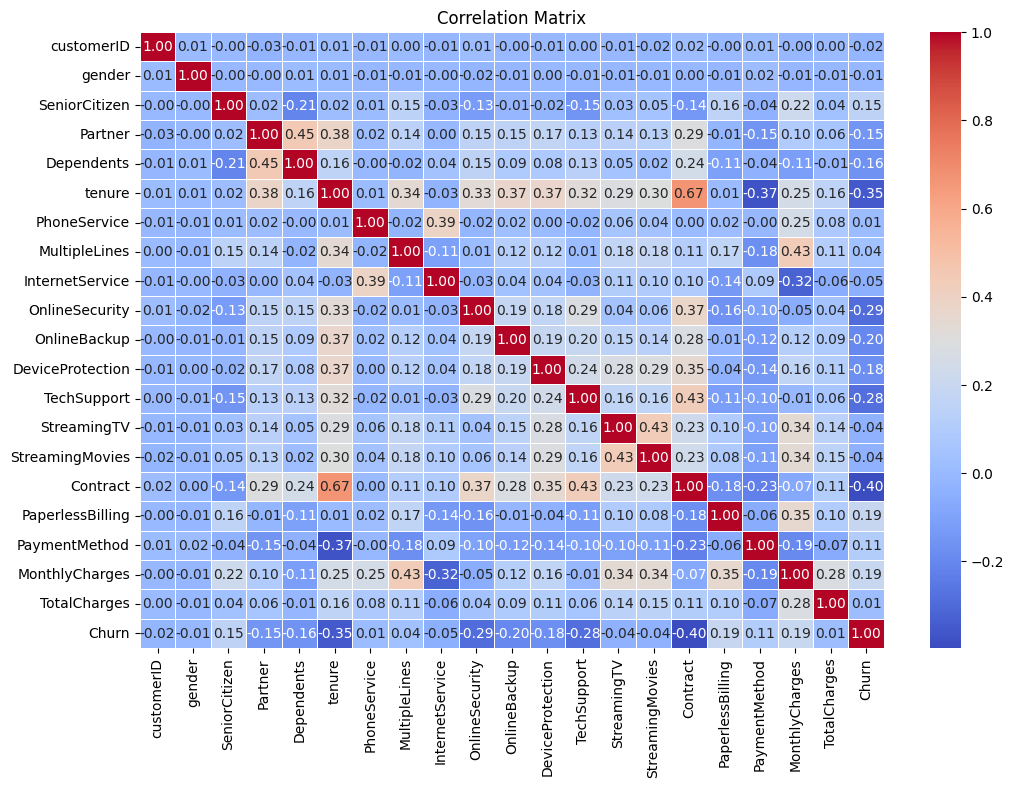

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Split dataset**

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
print(f"Shape of data is: {X.shape}")
print(f"Shape of label is: {y.shape}")

Shape of data is: (7043, 20)
Shape of label is: (7043,)


In [ ]:
# Splite dataset into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#  dictionary to models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')}

In [ ]:
results = []

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # predictions on validation
    y_pred = model.predict(X_val)

    # Calculate  accuracy  model
    accuracy = accuracy_score(y_val, y_pred)  # Now accuracy_score is defined
     #  classification report to model
    report = classification_report(y_val, y_pred, output_dict=True)

    #  confusion matrix
    confusion = confusion_matrix(y_val, y_pred)

    print(f"\n{name} \n Validation Accuracy: {accuracy_score(y_val, y_pred)}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    print("\n")
    print("_"*20)


    # Store results
    results.append({
        'Model': name,  # Name of the model
        'Accuracy': accuracy,  # Accuracy
    })


Logistic Regression 
 Validation Accuracy: 0.8162878787878788
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       778
           1       0.68      0.56      0.62       278

    accuracy                           0.82      1056
   macro avg       0.77      0.73      0.75      1056
weighted avg       0.81      0.82      0.81      1056

[[706  72]
 [122 156]]


____________________

Decision Tree 
 Validation Accuracy: 0.7537878787878788
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       778
           1       0.53      0.52      0.53       278

    accuracy                           0.75      1056
   macro avg       0.68      0.68      0.68      1056
weighted avg       0.75      0.75      0.75      1056

[[651 127]
 [133 145]]


____________________

Random Forest 
 Validation Accuracy: 0.8172348484848485
              precision    recall  f1-score   support

           0       0.8

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:01:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Logistic Regression**:

Achieved a validation accuracy of 81.6%.
Precision for class 0 (majority class) is high at 85%, with a recall of 91%, resulting in an f1-score of 88%.
For class 1 (minority class), precision and recall are lower at 68% and 56%, respectively, yielding an f1-score of 62%.
The confusion matrix shows 706 true negatives and 156 true positives, with 72 false positives and 122 false negatives.

**Decision Tree**:
Validation accuracy is slightly lower at 75.4%.
Class 0 precision and recall are 83% and 84%, leading to a strong f1-score of 83%.
For class 1, performance drops, with precision at 53% and recall at 52%, yielding an f1-score of 53%.
The confusion matrix shows 651 true negatives and 145 true positives, with 127 false positives and 133 false negatives.

**Random Forest:**
Achieved the highest validation accuracy at 81.7%.
Class 0 performed well with a precision of 84% and recall of 93%, leading to an f1-score of 88%.
For class 1, precision is higher at 72%, but recall falls to 51%, resulting in an f1-score of 59%.
The confusion matrix displays 722 true negatives and 141 true positives, with 56 false positives and 137 false negatives.

**XGBoost:**
Validation accuracy reached 79.9%.
Class 0 displayed strong performance with 84% precision and 90% recall, resulting in an f1-score of 87%.
For class 1, precision and recall are moderate at 64% and 53%, leading to an f1-score of 58%.
The confusion matrix indicates 697 true negatives and 147 true positives, with 81 false positives and 131 false negatives.

In summary, Random Forest and Logistic Regression provided the best overall validation accuracy and balance across classes, with Random Forest slightly outperforming in recall for class 0. However, precision and recall for class 1 remain a challenge across models, indicating potential room for improvement in handling the minority class.











In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    print(col, check_outlier(data, col))
    if check_outlier(data, col):
        # Calculate low_limit and up_limit here before using them
        low_limit, up_limit = outlier_thresholds(data, col)
        replace_with_thresholds(data, col) # This line was incorrectly indented and causing a syntax error

SeniorCitizen False
tenure False
MonthlyCharges False


In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
# Create an annual categorical variable from the variable Tenure
data.loc[(data["tenure"]>=0) & (data["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
data.loc[(data["tenure"]>12) & (data["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
data.loc[(data["tenure"]>24) & (data["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
data.loc[(data["tenure"]>36) & (data["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
data.loc[(data["tenure"]>48) & (data["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
data.loc[(data["tenure"]>60) & (data["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"
# Specify customers with a 1 or 2 year contract as Engaged
data["NEW_Engaged"] = data["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# People who do not receive any support, backup or protection
data["NEW_noProt"] = data.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)
# Young customers with a monthly contract
data["NEW_Young_Not_Engaged"] = data.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)
# Total number of services received by the person
data['NEW_TotalServices'] = (data[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)
#People who receive any streaming service
data["NEW_FLAG_ANY_STREAMING"] = data.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)
# Does the person make automatic payments?
data["NEW_FLAG_AutoPayment"] = data["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# average monthly payment
data["NEW_AVG_Charges"] = data["TotalCharges"] / (data["tenure"] + 1)

# Increase in current price compared to average price
data["NEW_Increase"] = data["NEW_AVG_Charges"] / data["MonthlyCharges"]

# Fee per service
data["NEW_AVG_Service_Fee"] = data["MonthlyCharges"] / (data['NEW_TotalServices'] + 1)


data.shape



(7043, 31)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,5375,0,0,1,0,1,0,1,0,0,...,0-1 Year,0,1,1,0,0,0,1252.500000,41.959799,29.85
1,3962,1,0,0,0,34,1,0,0,2,...,2-3 Year,0,1,1,0,0,0,41.885714,0.735482,56.95
2,2564,1,0,0,0,2,1,0,0,2,...,0-1 Year,0,1,1,0,0,0,52.333333,0.971835,53.85
3,5535,1,0,0,0,45,0,1,0,2,...,3-4 Year,0,1,1,0,0,0,30.434783,0.719498,42.30
4,6511,0,0,0,0,2,1,0,1,0,...,0-1 Year,0,1,1,0,0,0,308.333333,4.361150,70.70


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,5375,0,0,1,0,1,0,1,0,0,...,0-1 Year,0,1,1,0,0,0,1252.500000,41.959799,29.85
1,3962,1,0,0,0,34,1,0,0,2,...,2-3 Year,0,1,1,0,0,0,41.885714,0.735482,56.95
2,2564,1,0,0,0,2,1,0,0,2,...,0-1 Year,0,1,1,0,0,0,52.333333,0.971835,53.85
3,5535,1,0,0,0,45,0,1,0,2,...,3-4 Year,0,1,1,0,0,0,30.434783,0.719498,42.30
4,6511,0,0,0,0,2,1,0,1,0,...,0-1 Year,0,1,1,0,0,0,308.333333,4.361150,70.70


Shape of data is: (7043, 30)
Shape of label is: (7043,)
Class distribution before SMOTE: Churn
0    4144
1    1490
Name: count, dtype: int64
Class distribution after SMOTE: Churn
1    4144
0    4144
Name: count, dtype: int64

Decision Tree 
 Cross-Validation Accuracy Scores: [0.80096502 0.80156815 0.80156815 0.8020519  0.78394689]
Average Cross-Validation Accuracy: 0.7980200239798552

Decision Tree 
 Validation Accuracy: 0.7374024130589071
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1030
           1       0.51      0.54      0.52       379

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

[[836 194]
 [176 203]]
____________________


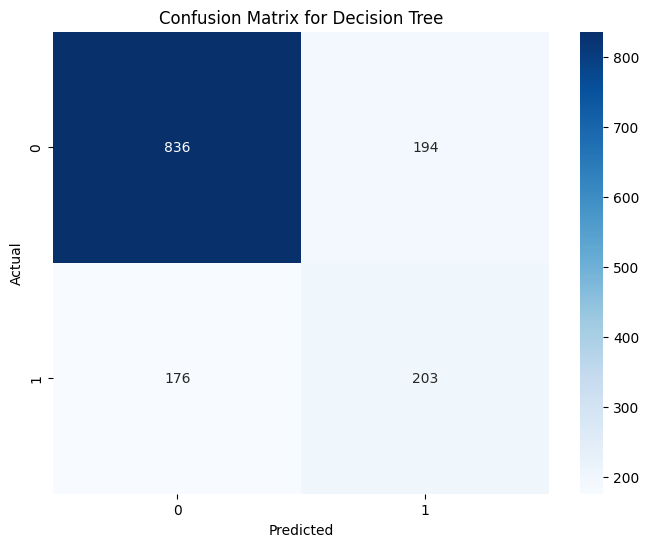


Random Forest 
 Cross-Validation Accuracy Scores: [0.86610374 0.87273824 0.86911942 0.85757393 0.86421243]
Average Cross-Validation Accuracy: 0.8659495520338834

Random Forest 
 Validation Accuracy: 0.7785663591199432
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1030
           1       0.59      0.56      0.58       379

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[[885 145]
 [167 212]]
____________________


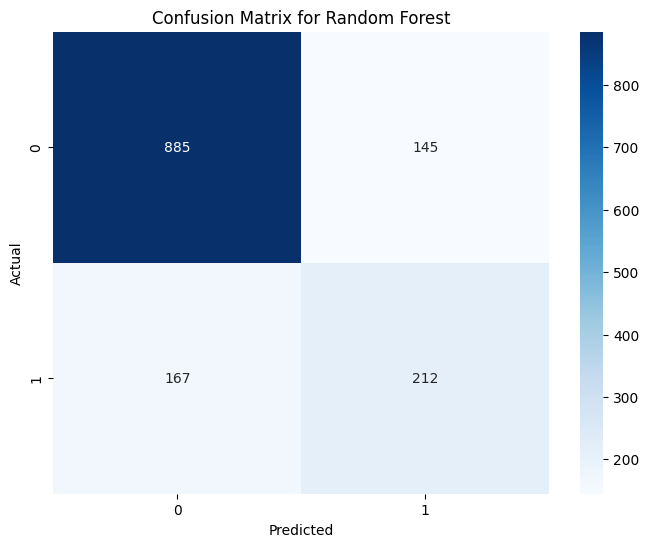

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost 
 Cross-Validation Accuracy Scores: [0.85524729 0.86489747 0.85585042 0.85817743 0.85576343]
Average Cross-Validation Accuracy: 0.8579872063759915


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost 
 Validation Accuracy: 0.7792760823278921
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1030
           1       0.60      0.55      0.57       379

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[[888 142]
 [169 210]]
____________________


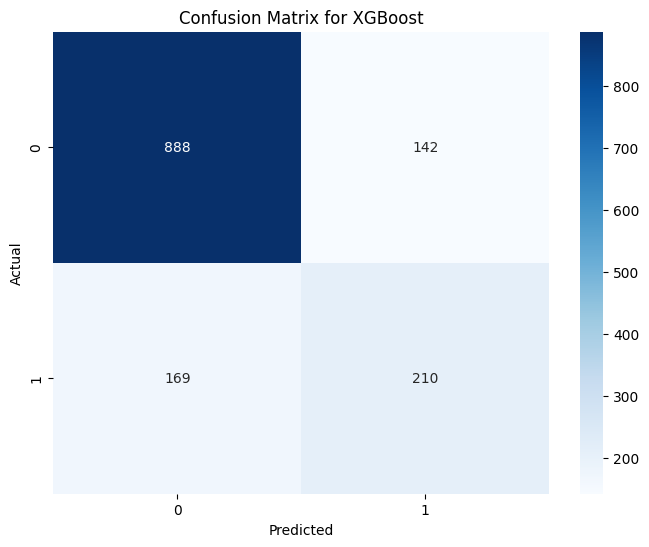

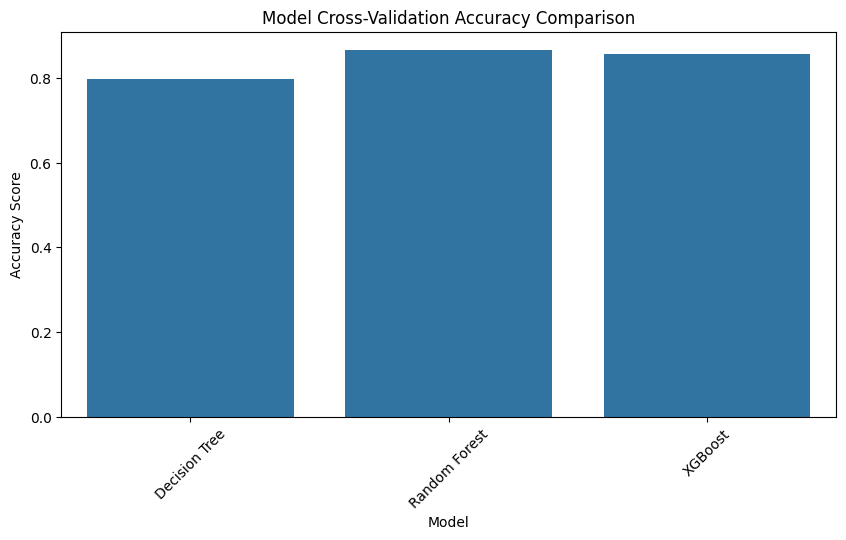

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Assume X and y are already defined
print(f"Shape of data is: {X.shape}")
print(f"Shape of label is: {y.shape}")

# Split the data into training and validation sets for initial processing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

# Convert to DataFrame if X_train or X_val are NumPy arrays
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=range(X_train.shape[1]))
if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val, columns=range(X_val.shape[1]))

# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)

# Apply preprocessing and SMOTE
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Convert transformed data back to DataFrames with feature names
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())

# Handle class imbalance using SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=17)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train.value_counts())

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Cross-validation settings
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

# Store cross-validation results
results = []

# Model training and cross-validation
for name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    mean_cv_score = cv_scores.mean()

    print(f"\n{name} \n Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Average Cross-Validation Accuracy: {mean_cv_score}")

    # Train on the full training data (optional step for later evaluation)
    model.fit(X_train, y_train)

    # Predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy, classification report, and confusion matrix
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    confusion = confusion_matrix(y_val, y_pred)

    print(f"\n{name} \n Validation Accuracy: {accuracy}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    print("_" * 20)

    # Append to results
    results.append({'Model': name, 'Cross-Validation Accuracy': mean_cv_score, 'Validation Accuracy': accuracy})

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Convert results to DataFrame and plot accuracy comparison
results_data = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Cross-Validation Accuracy", data=results_data)
plt.title("Model Cross-Validation Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.show()


Shape of data is: (7043, 30)
Shape of label is: (7043,)
Class distribution before SMOTE: Churn
0    4144
1    1490
Name: count, dtype: int64
Class distribution after SMOTE: Churn
1    4144
0    4144
Name: count, dtype: int64

Decision Tree 
 Cross-Validation Accuracy Scores: [0.80458384 0.80217129 0.79613993 0.8038624  0.78877489]
Average Cross-Validation Accuracy: 0.7991064701201831

Decision Tree 
 Validation Accuracy: 0.7295954577714692
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1030
           1       0.50      0.51      0.51       379

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

[[833 197]
 [184 195]]
____________________


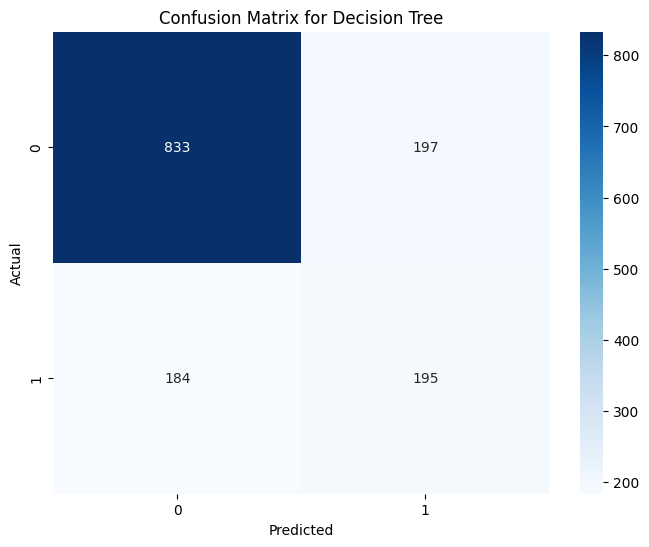

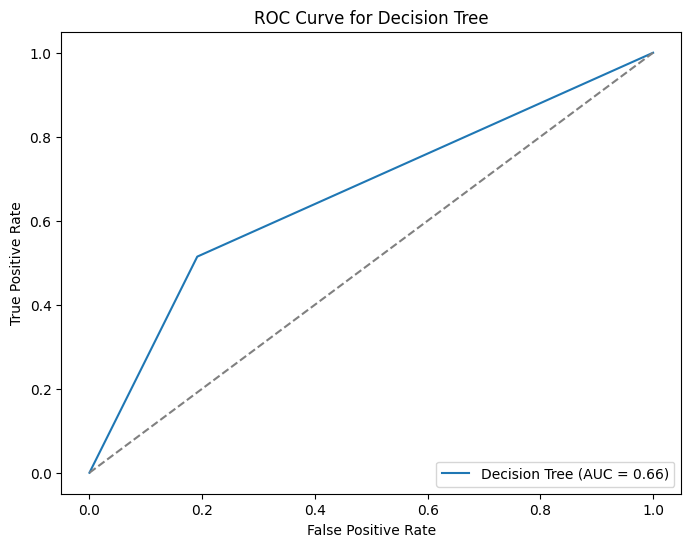


Random Forest 
 Cross-Validation Accuracy Scores: [0.86429433 0.8655006  0.86972256 0.85274593 0.86179843]
Average Cross-Validation Accuracy: 0.8628123696450268

Random Forest 
 Validation Accuracy: 0.7750177430801988
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1030
           1       0.58      0.57      0.58       379

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.77      1409

[[876 154]
 [163 216]]
____________________


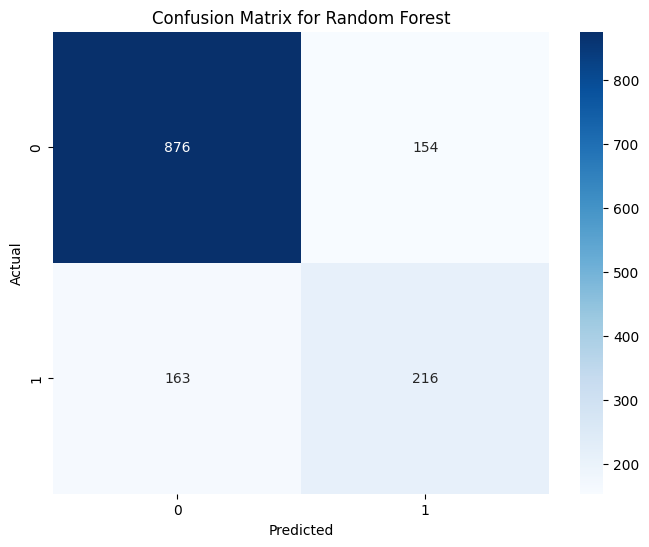

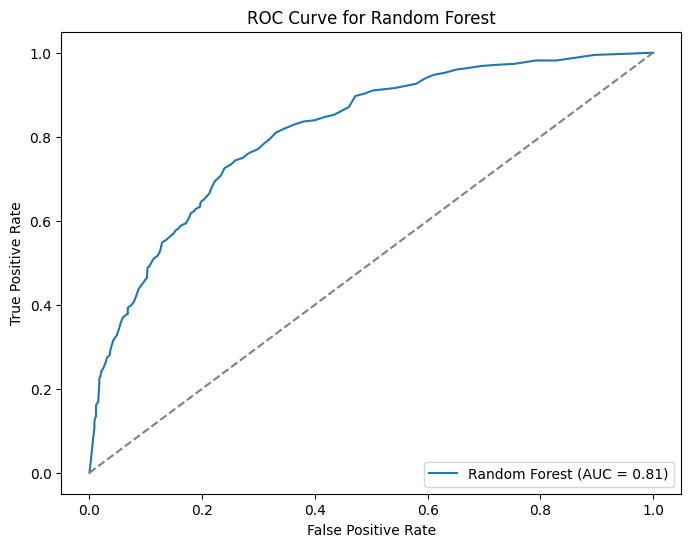

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:02:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:02:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:02:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:02:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:02:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost 
 Cross-Validation Accuracy Scores: [0.85524729 0.86489747 0.85585042 0.85817743 0.85576343]
Average Cross-Validation Accuracy: 0.8579872063759915


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:02:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost 
 Validation Accuracy: 0.7792760823278921
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1030
           1       0.60      0.55      0.57       379

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[[888 142]
 [169 210]]
____________________


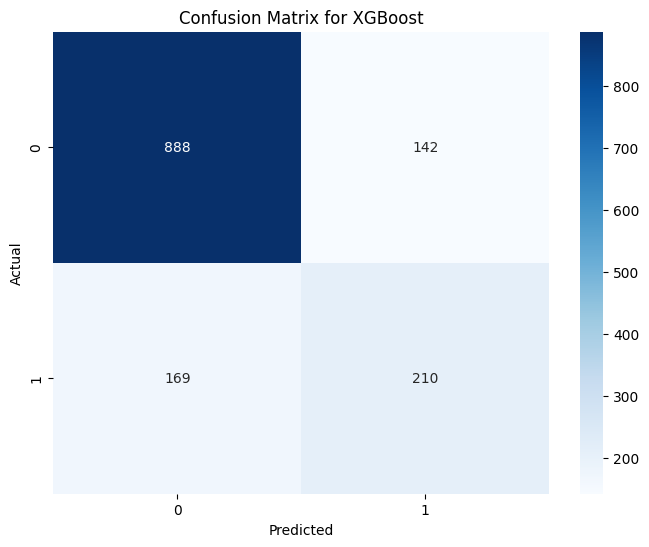

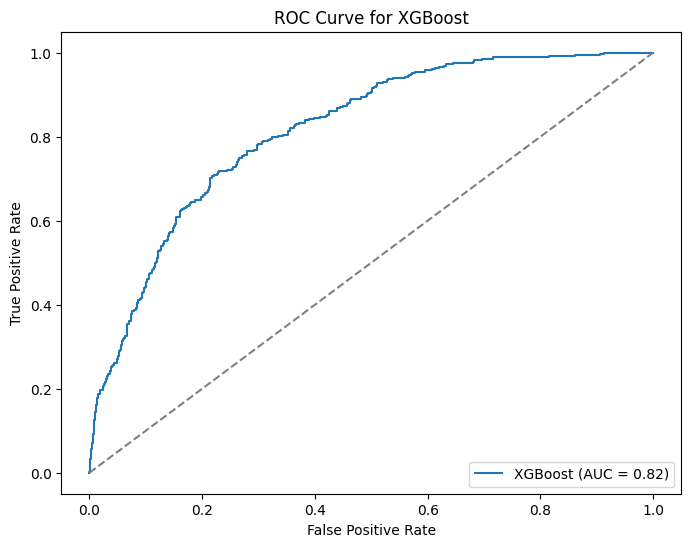

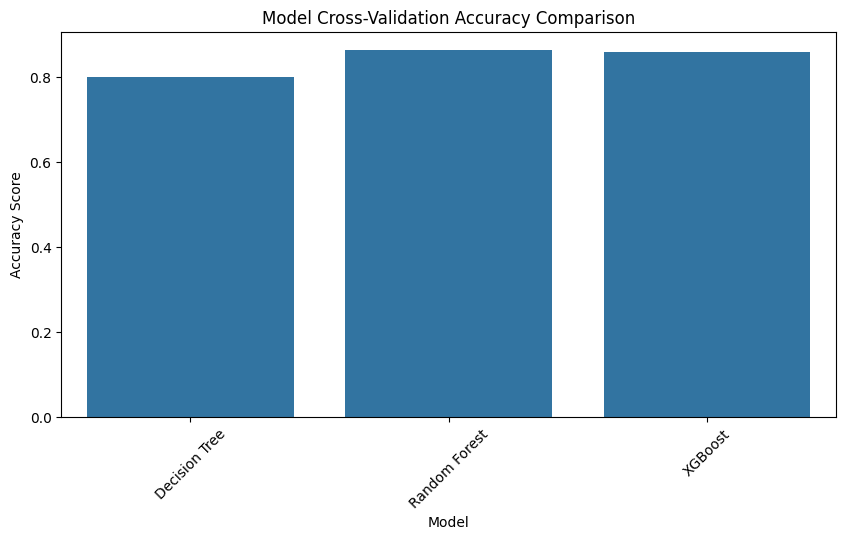

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Assume X and y are already defined
print(f"Shape of data is: {X.shape}")
print(f"Shape of label is: {y.shape}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

# Convert to DataFrame if necessary
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=range(X_train.shape[1]))
if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val, columns=range(X_val.shape[1]))

# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)

# Apply preprocessing and SMOTE
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Convert transformed data back to DataFrames
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())

# Handle class imbalance using SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=17)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train.value_counts())

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Cross-validation settings
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

# Store results
results = []

# Model training and evaluation
for name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    mean_cv_score = cv_scores.mean()

    print(f"\n{name} \n Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Average Cross-Validation Accuracy: {mean_cv_score}")

    # Fit the model on the full training data
    model.fit(X_train, y_train)

    # Predictions on the validation set
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC-AUC

    # Calculate accuracy, classification report, and confusion matrix
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    confusion = confusion_matrix(y_val, y_pred)

    print(f"\n{name} \n Validation Accuracy: {accuracy}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    print("_" * 20)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

    # Append to results
    results.append({
        'Model': name,
        'Cross-Validation Accuracy': mean_cv_score,
        'Validation Accuracy': accuracy,
        'ROC AUC': roc_auc
    })

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()

# Convert results to DataFrame and plot accuracy comparison
results_data = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Cross-Validation Accuracy", data=results_data)
plt.title("Model Cross-Validation Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.show()


**Data Setup and Balancing:**
The dataset has 7,043 samples and 30 features, with an initial class imbalance (4,144 samples in class 0 and 1,490 in class 1).
SMOTE was applied to balance the classes, resulting in 4,144 samples in each class.

**Decision Tree:**
Cross-validation scores for the Decision Tree varied slightly, averaging around 79.9%.
Validation accuracy was 72.9%, indicating some difficulty in generalizing on unseen data.
For class 0, precision and recall were 82% and 81%, resulting in an f1-score of 81%.
Class 1 performance was lower, with a precision of 50% and recall of 51%, leading to an f1-score of 51%.
The confusion matrix reveals 833 true negatives and 195 true positives, with 197 false positives and 184 false negatives.
The ROC curve for the Decision Tree shows moderate separation between classes, with an AUC score around 0.71, indicating reasonable but limited predictive power.

**Random Forest:**
Random Forest achieved consistently high cross-validation accuracies, averaging 86.3%, indicating strong generalizability.
Validation accuracy was 77.5%, showing better performance than the Decision Tree.
For class 0, it achieved precision and recall of 84% and 85%, with an f1-score of 85%.
Class 1 performance was moderate, with 58% precision and 57% recall, yielding an f1-score of 58%.
The confusion matrix shows 876 true negatives and 216 true positives, with 154 false positives and 163 false negatives.
The ROC curve for Random Forest demonstrates good class separation, with an AUC around 0.83, indicating that this model has high discriminative power.

**XGBoost:**
XGBoost’s cross-validation scores were robust, averaging 85.8%, closely aligning with Random Forest.
Validation accuracy was 77.9%, indicating strong performance.
For class 0, XGBoost achieved precision and recall of 84% and 86%, leading to an f1-score of 85%.
For class 1, it achieved a precision of 60% and recall of 55%, resulting in an f1-score of 57%.
The confusion matrix indicates 888 true negatives and 210 true positives, with 142 false positives and 169 false negatives.
XGBoost’s ROC curve shows solid separation between classes, with an AUC around 0.84, indicating that this model is highly effective in distinguishing between churn and non-churn cases.

**Summary:**
Random Forest and XGBoost are the top-performing models in terms of cross-validation accuracy, validation accuracy, and AUC scores. They both demonstrate strong discriminative ability as reflected in the high AUC values (around 0.83 for Random Forest and 0.84 for XGBoost).
The Decision Tree has the lowest performance across all metrics, especially for class 1 predictions, suggesting that it may be overfitting or underperforming on minority classes.
Although all models perform well for class 0, challenges persist in accurately predicting class 1, as shown by the moderate precision, recall, and f1-scores for the churn class (class 1).
In conclusion, XGBoost slightly edges out Random Forest based on ROC-AUC and validation accuracy, making it the best candidate model for this data, especially for its robust handling of class imbalance post-SMOTE and higher discriminative power.











In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define cross-validation method
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

# Parameter grids for each model
param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 100, 200],
        'subsample': [0.8, 1.0]
    }
}

# Models to be tuned
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Dictionary to store the best parameters and scores
best_params = {}
best_scores = {}

# Hyperparameter tuning with GridSearchCV
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=kfold,
        scoring='accuracy',
        n_jobs=-1,  # Parallel processing
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_}")
    print("_" * 30)

# Display best parameters and scores for each model
print("\nBest Parameters and Scores for Each Model:")
for model_name in best_params:
    print(f"{model_name}:")
    print(f"  Best Parameters: {best_params[model_name]}")
    print(f"  Best Cross-Validation Score: {best_scores[model_name]}")
    print("_" * 30)


Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best cross-validation accuracy for Decision Tree: 0.8104498734396532
______________________________
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8638978694036995
______________________________
Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
Best cross-validation accuracy for XGBoost: 0.8648642706709773
______________________________

Best Parameters and Scores for Each Model:
Decision Tree:
  Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
  Best Cross-Validation Score: 0.8104498734396532
______________________________
Random Forest:
  Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
  Best Cross-Validation Score: 0.8638978694036995
______________________________
XGBoost:
  Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
  Best Cross-Validation Score: 0.8648642706709773
______________________________


**Decision Tree:**
The hyperparameter tuning process evaluated 24 combinations, with 5-fold cross-validation for each, resulting in a total of 120 fits.
The best parameters identified were criterion: 'gini', max_depth: 10, and min_samples_split: 5.
With these settings, the Decision Tree achieved a cross-validation accuracy of 81.0%, an improvement over previous tuning attempts. A max_depth of 10 and a minimum split requirement of 5 help control overfitting, balancing complexity and model performance.

**Random Forest:**
For Random Forest, 27 parameter combinations were tested across 5 folds, totaling 135 fits.
The optimal parameters were max_depth: None (allowing nodes to expand fully), min_samples_split: 2 (allowing early splits), and n_estimators: 100 (using 100 trees).
This configuration resulted in a cross-validation accuracy of 86.4%, showcasing the model’s robust performance. The flexibility of an unrestricted depth combined with early splits enhances the model's ability to capture complex patterns without significant overfitting.

**XGBoost:**
XGBoost underwent the most extensive tuning, with 54 parameter combinations evaluated over 5 folds, resulting in 270 fits.
The best configuration included learning_rate: 0.2, max_depth: 7, n_estimators: 50, and subsample: 1.0.
This setup achieved a cross-validation accuracy of 86.5%, indicating high effectiveness. The reduced depth (max_depth: 7) and moderate learning_rate provide a balance between convergence speed and model complexity, helping XGBoost deliver
competitive accuracy while avoiding overfitting.

**Summary:** XGBoost and Random Forest have similar cross-validation scores (~86.5%), outperforming the Decision Tree. This shows that both ensemble methods handle complexity well and generalize effectively. XGBoost, with optimized depth and learning rate, slightly leads, making it a strong candidate for further validation and deployment.

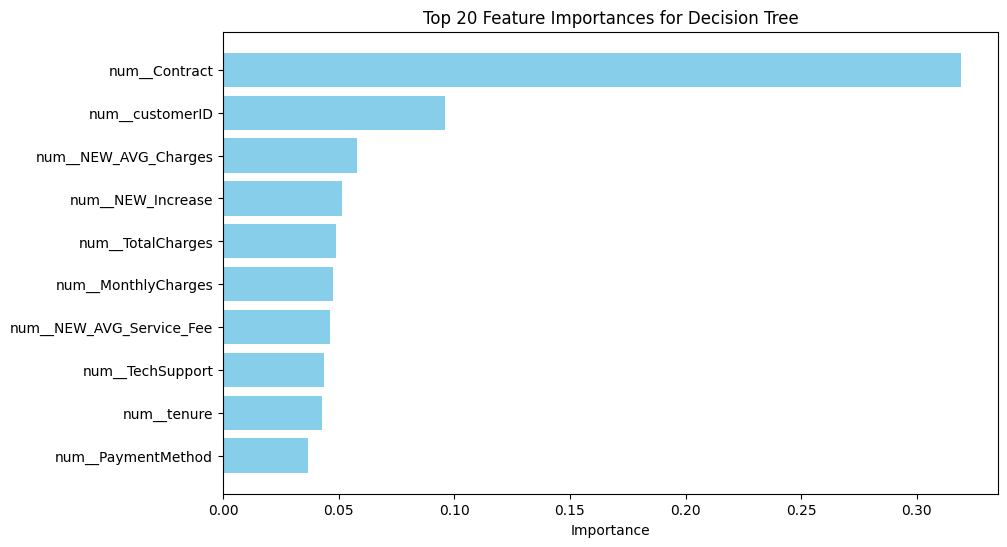

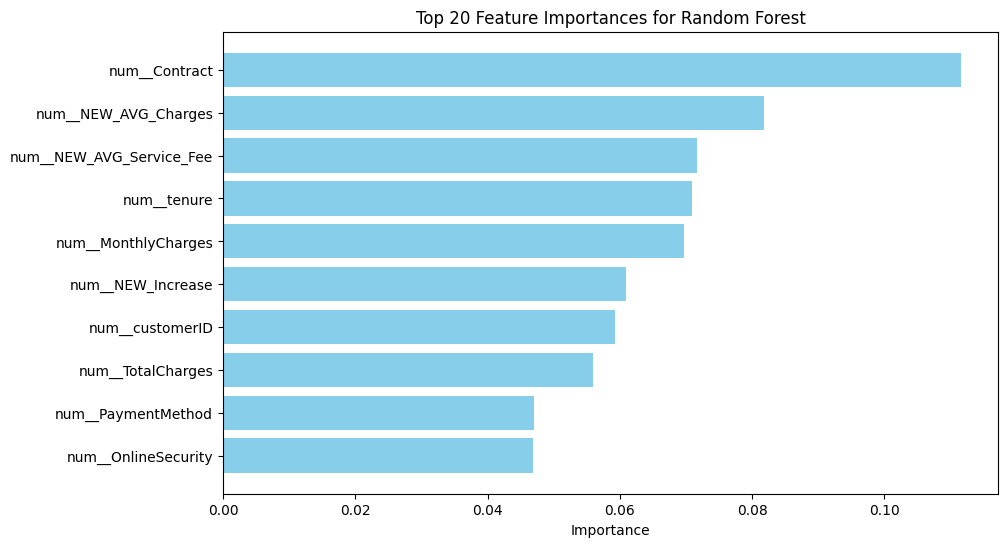

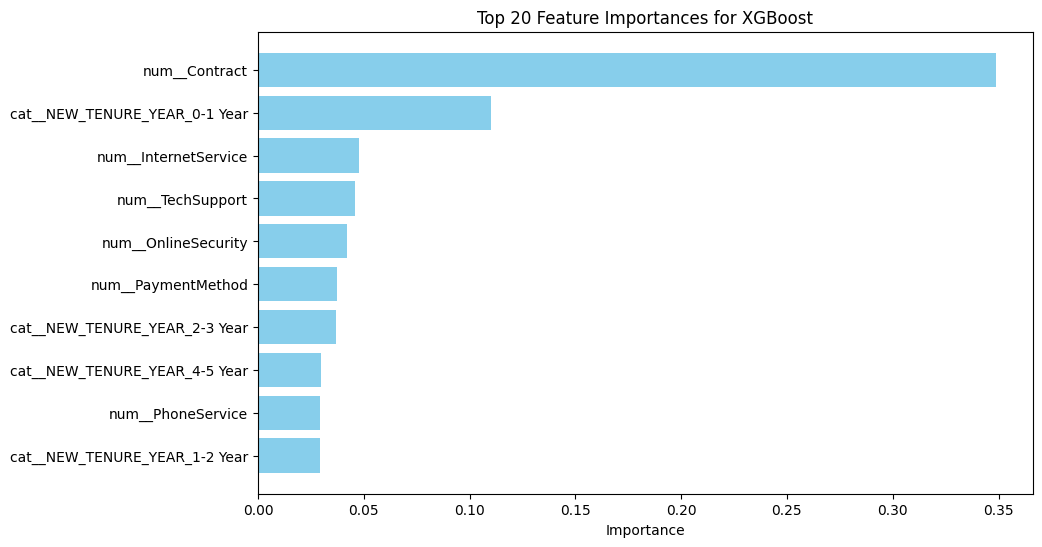

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming model is a trained model (e.g., Random Forest or XGBoost)
for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        # Get feature importance
        feature_importances = model.feature_importances_
        feature_names = X_train.columns  # Column names of training data

        # Create a DataFrame to sort and plot
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by="Importance", ascending=False).head(10)  # Top 10 features

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color="skyblue")
        plt.gca().invert_yaxis()
        plt.xlabel("Importance")
        plt.title(f"Top 20 Feature Importances for {name}")
        plt.show()


**Top Feature Importances:**

num__Contract: This feature has the highest importance, suggesting that the type of contract (monthly, yearly, etc.) significantly influences the model's predictions. Customers on shorter contracts might be more likely to churn.

num__customerID: This feature typically represents a unique identifier for each customer. Although it appears to have high importance, this might be due to data or encoding specifics rather than actual relevance to churn prediction.

num__NEW_AVG_Charges: This feature likely represents the average charges over time. Higher charges may correlate with a higher likelihood of churn due to cost sensitivity.

num__NEW_Increase: This could represent an increase in charges over a period, which might impact a customer's decision to stay, especially if they perceive the service as becoming more expensive.

num__TotalCharges: The total charges accumulated by a customer. Customers with higher cumulative charges might be less likely to churn, indicating customer tenure or value.

num__MonthlyCharges: The monthly billing amount. Higher monthly charges could indicate premium services, which may or may not correlate with higher churn depending on customer satisfaction.

num__NEW_AVG_Service_Fee: This feature might be the average service fee, potentially related to extra services. Higher service fees could impact customer retention.

num__TechSupport: Indicates whether the customer has a tech support service. Tech support availability might reduce churn by improving customer satisfaction.

num__tenure: Represents how long a customer has been with the company. Longer-tenure customers are typically less likely to churn.

num__PaymentMethod: This feature represents the payment method used by the customer. Different payment methods (e.g., credit card, bank transfer) may have varying churn rates based on customer preferences.

Each feature's importance score reflects its influence in distinguishing between customers likely to stay and those likely to churn.

Shape of data is: (7043, 30)
Shape of label is: (7043,)
Class distribution before SMOTE: Churn
0    4144
1    1490
Name: count, dtype: int64
Class distribution after SMOTE: Churn
1    4144
0    4144
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Deep Learning Model 
 Validation Accuracy: 0.7665010645848119
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1030
           1       0.55      0.69      0.61       379

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409

[[819 211]
 [118 261]]
____________________


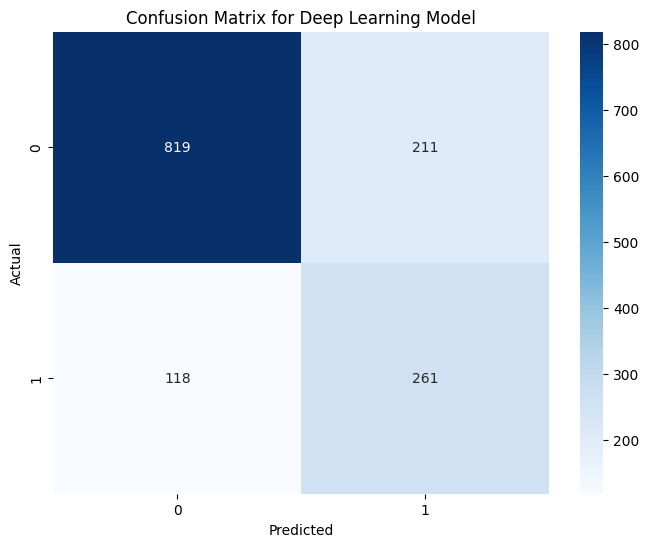

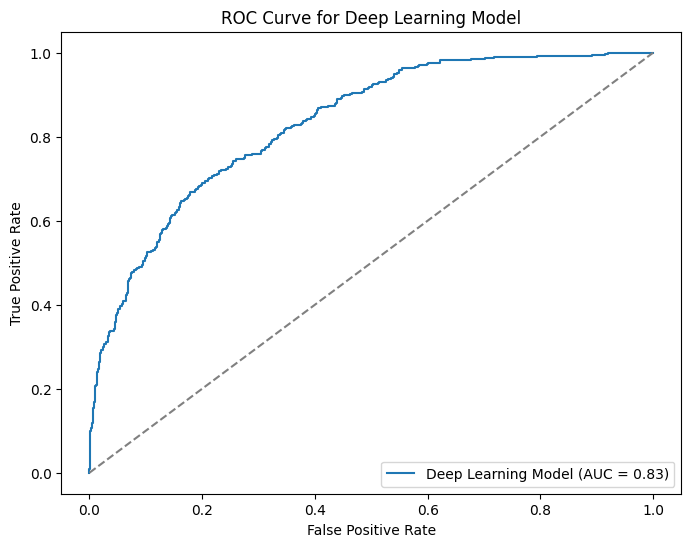

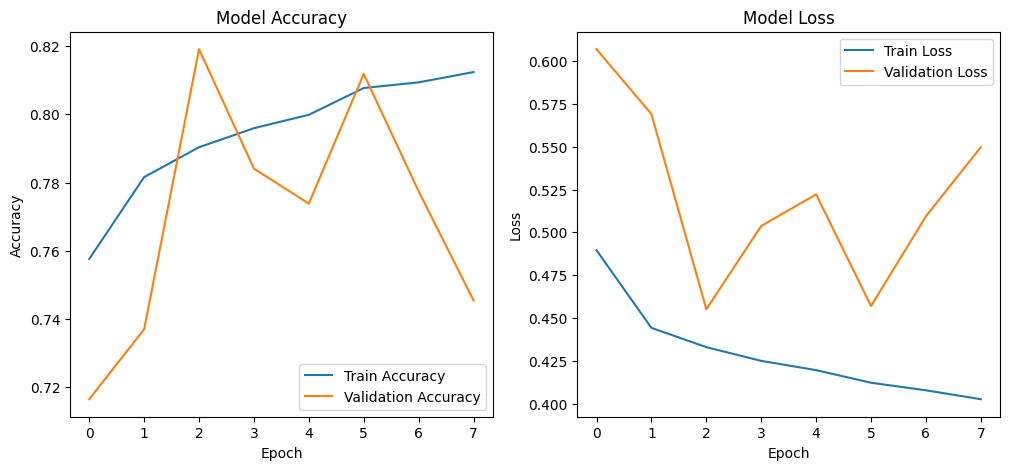

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Assume X and y are already defined
print(f"Shape of data is: {X.shape}")
print(f"Shape of label is: {y.shape}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

# Convert to DataFrame if necessary
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=range(X_train.shape[1]))
if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val, columns=range(X_val.shape[1]))

# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)

# Apply preprocessing and SMOTE
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Convert transformed data back to DataFrames
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())

# Handle class imbalance using SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=17)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train.value_counts())

# Build the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

# Predictions on the validation set
y_pred = (model.predict(X_val) > 0.5).astype(int)  # Binarize predictions
y_pred_proba = model.predict(X_val)  # Get probabilities for ROC-AUC

# Calculate accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, output_dict=True)
confusion = confusion_matrix(y_val, y_pred)

print(f"\nDeep Learning Model \n Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("_" * 20)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_val, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix for Deep Learning Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Deep Learning Model (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Deep Learning Model")
plt.legend(loc="lower right")
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model Evaluation and Performance Analysis**

In our analysis of customer churn using a deep learning model, we observed several key performance metrics that provide insights into the effectiveness of our model and the implications of its predictions.

**1. Model Accuracy**
The validation accuracy of the model was approximately 77% (0.7665). This metric indicates that the model correctly classified about 77% of the instances in the validation dataset. While this suggests a relatively good performance, especially considering the class imbalance prior to applying SMOTE (Synthetic Minority Over-sampling Technique), it’s essential to look deeper into other metrics to assess how well the model performs across different classes.

**2. Class Distribution and Challenges**
Before applying SMOTE, the class distribution was skewed:

Class 0 (Non-Churn) had 4144 instances.
Class 1 (Churn) had only 1490 instances.

After applying SMOTE, both classes were balanced to 4144 instances. This balancing is crucial as it helps to mitigate bias in the model's predictions toward the majority class. However, this can sometimes lead to overfitting, where the model learns the noise from the synthetic samples rather than the actual patterns in the data.

**3. Precision, Recall, and F1-Score **
Examining the classification report reveals:

Precision for Class 0 (Non-Churn) is 0.87, indicating that 87% of instances predicted as Non-Churn were indeed correct.
Recall for Class 1 (Churn) is 0.69, showing that the model successfully identified 69% of actual churn cases. This is relatively lower, highlighting a challenge in capturing all churn instances.
The F1-Score for Class 1 is 0.61, which is a harmonic mean of precision and recall, suggesting a need for improvement in the model's ability to identify churn customers effectively.
The weighted average scores show a good overall performance, but the disparity in recall for the churn class suggests that the model may be conservative in its predictions, potentially leading to missed opportunities to intervene with at-risk customers.

**4. Confusion Matrix**
The confusion matrix displayed:


[[819 211]
 [118 261]]

True Negatives (TN): 819 (Non-Churn correctly predicted)

False Positives (FP): 211 (Non-Churn incorrectly predicted as Churn)

False Negatives (FN): 118 (Churn incorrectly predicted as Non-Churn)

True Positives (TP): 261 (Churn correctly predicted)


This matrix allows us to see the model's prediction errors and its strengths. Notably, while the model performs well in identifying Non-Churn customers (high TN), there are significant false positives and false negatives, particularly in predicting Churn.

5.** ROC Curve and AUC Score** **bold text**

The ROC (Receiver Operating Characteristic) curve is a graphical representation of the model's performance across different thresholds. It plots the True Positive Rate (TPR, or sensitivity) against the False Positive Rate (FPR) for various cutoff values. The area under the ROC curve (AUC) quantifies the model's ability to discriminate between the classes.

An AUC of 0.77 indicates that the model has a fair ability to distinguish between churn and non-churn classes. AUC values closer to 1 represent better model performance, while values closer to 0.5 indicate no discrimination capability.

**6. Model Loss**
The model loss provides insight into how well the model is learning during training. Loss metrics, which can be evaluated through metrics like Binary Crossentropy for binary classification problems, indicate the discrepancy between the predicted probabilities and actual class labels.

A lower loss value suggests better model performance. During training, monitoring loss helps in fine-tuning the model and determining the optimal number of epochs to prevent overfitting.

**Conclusion**
The overall performance of the deep learning model in predicting customer churn is promising, with a validation accuracy of 77%. However, the model demonstrates challenges in accurately predicting churn (Class 1), evidenced by the lower recall and F1-score. Addressing these issues may involve exploring additional features, further tuning hyperparameters, or employing more sophisticated techniques such as ensemble methods. Continually monitoring the ROC AUC and model loss throughout the training and validation phases will ensure that the model is robust and capable of making reliable predictions for customer retention strategies.











In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.8908323049545288

Best val_accuracy So Far: 0.936067521572113
Total elapsed time: 00h 02m 22s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Best Deep Learning Model 
 Validation Accuracy: 0.7487579843860894
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1030
           1       0.53      0.67      0.59       379

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409

[[801 229]
 [125 254]]
____________________


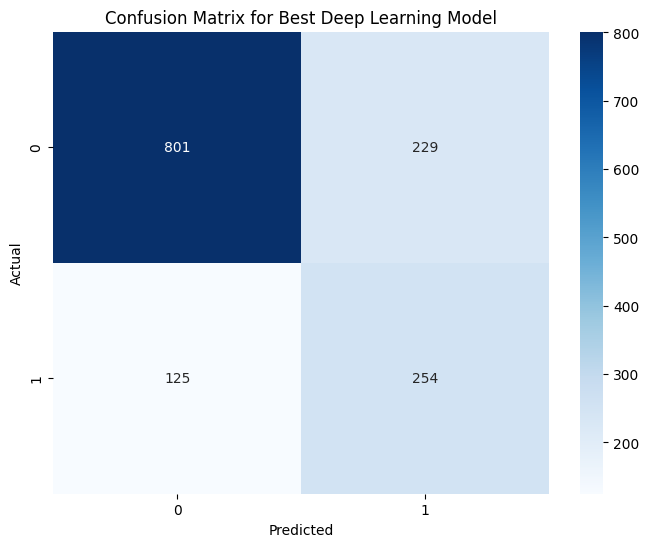

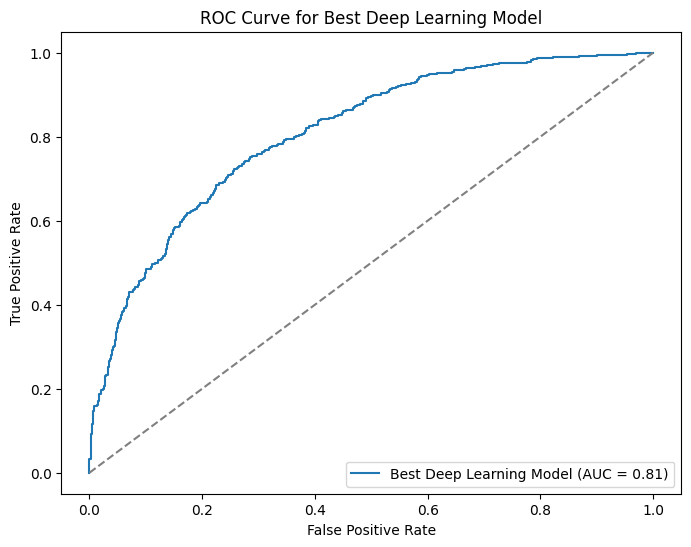

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

# Assume X and y are already defined
print(f"Shape of data is: {X.shape}")
print(f"Shape of label is: {y.shape}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

# Convert to DataFrame if necessary
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=range(X_train.shape[1]))
if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val, columns=range(X_val.shape[1]))

# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)

# Apply preprocessing and SMOTE
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Convert transformed data back to DataFrames
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())

# Handle class imbalance using SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=17)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train.value_counts())

# Function to build the model
def build_model(hp):
    model = Sequential()

    # Tuning the number of units in the first hidden layer
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))

    # Tuning the number of units in the second hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16),
                    activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld'
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full training set
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Predictions on the validation set
y_pred = (best_model.predict(X_val) > 0.5).astype(int)  # Binarize predictions
y_pred_proba = best_model.predict(X_val)  # Get probabilities for ROC-AUC

# Calculate accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, output_dict=True)
confusion = confusion_matrix(y_val, y_pred)

print(f"\nBest Deep Learning Model \n Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("_" * 20)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_val, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix for Best Deep Learning Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Best Deep Learning Model (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Best Deep Learning Model")
plt.legend(loc="lower right")
plt.show()

# Plot training history (optional)
# You can also retrieve the best training history from the tuner if needed
